<a href="https://colab.research.google.com/github/brilliant168/brilliant168/blob/main/Sms_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding = 'latin1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### **Data Cleaning**
### **EDA ( Exprotary data analysis )**
### **Text Preprocessing**
### **Model Building**
### **Evaluation**
### **Improvements**
### **Website**
### **Deploy**


# **1. Data Cleaning**

In [ ]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['target'] = le.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.duplicated().sum()

0

# **2. EDA**

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

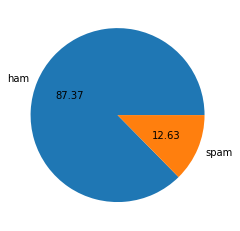

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['text_len'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,text_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['words_count'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,text_len,words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['sentense_count'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,text_len,words_count,sentense_count
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['text_len','words_count','sentense_count']].describe()

,text_len,words_count,sentense_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
df[df['target'] == 0][['text_len','words_count','sentense_count']].describe()

,text_len,words_count,sentense_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
df[df['target'] == 1][['text_len','words_count','sentense_count']].describe()

,text_len,words_count,sentense_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [ ]:
import seaborn as sns

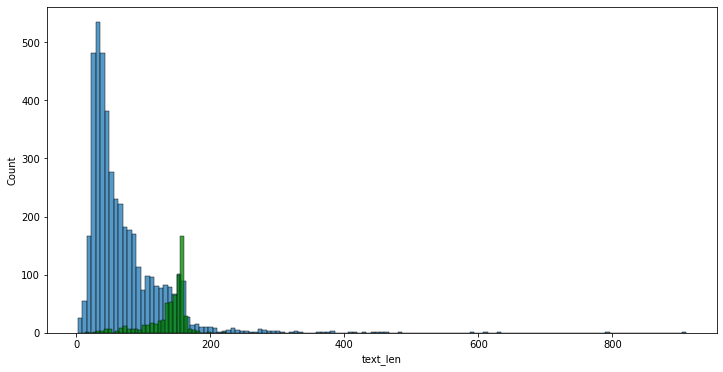

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['text_len'])
sns.histplot(df[df['target'] == 1]['text_len'], color = 'green')

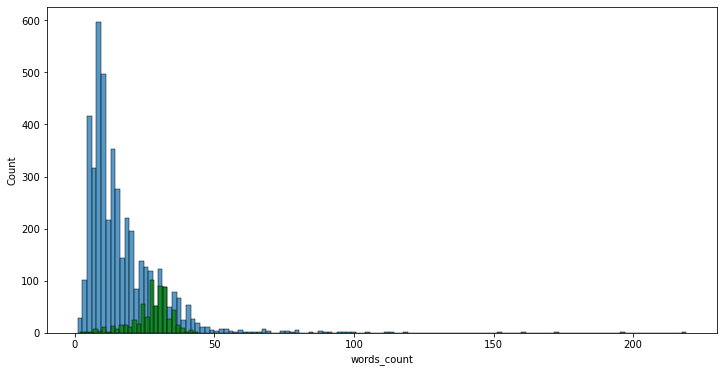

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['words_count'])
sns.histplot(df[df['target'] == 1]['words_count'], color = 'green')

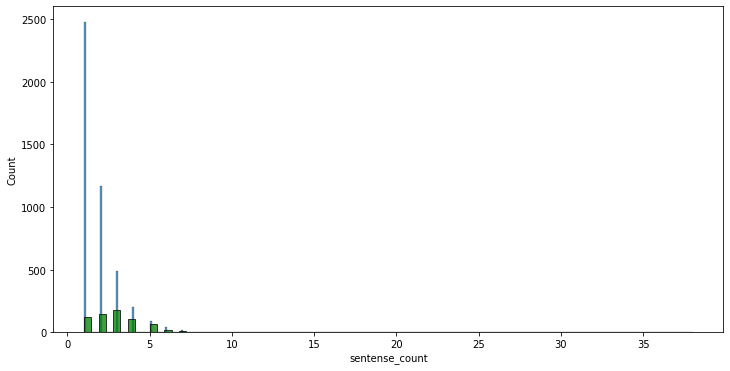

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['sentense_count'])
sns.histplot(df[df['target'] == 1]['sentense_count'], color = 'green')

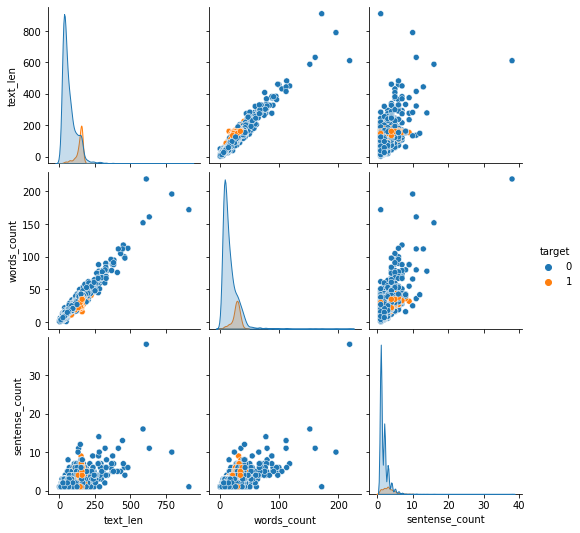

In [ ]:
sns.pairplot(df,hue = 'target')

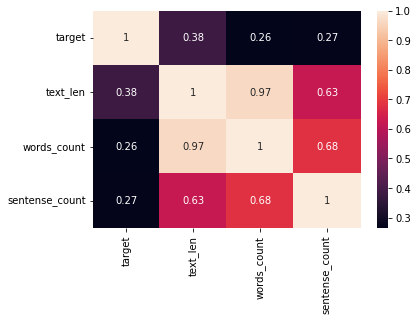

In [ ]:
sns.heatmap(df.corr(),annot = True)

# **3. Text Preorocessing**

1.   Lower case
2.   Tokenization
3.   Removing Special Characters
4.   Removing stop words and punctuation
3.   Stemming







In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:


from nltk.stem.snowball import PorterStemmer

In [ ]:
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [ ]:
def text_preprocessing(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return  " ".join(y)

In [ ]:
text_preprocessing('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df['text_preprocessed'] = df['text'].apply(text_preprocessing)

In [ ]:
df.head()

,target,text,text_len,words_count,sentense_count,text_preprocessed
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['text_preprocessed'].str.cat(sep = ' '))

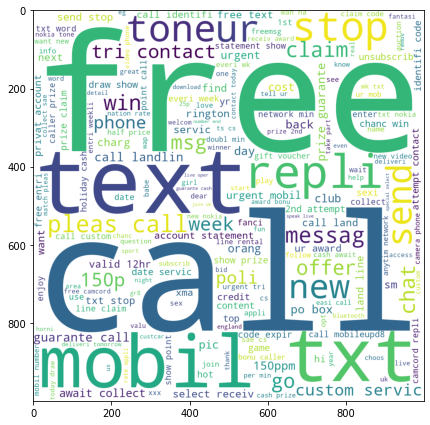

In [ ]:
plt.figure(figsize = (7,10))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['text_preprocessed'].str.cat(sep = ' '))

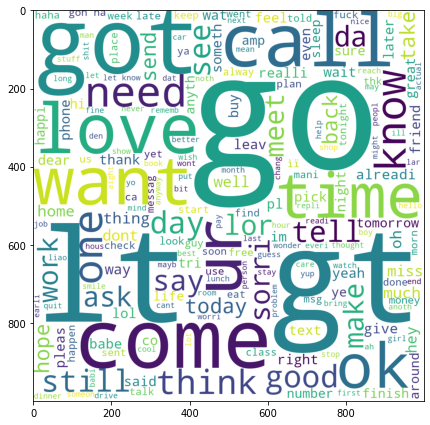

In [ ]:
plt.figure(figsize = (7,10))
plt.imshow(ham_wc)

In [ ]:
spam_words = []
for msg in df[df['target'] == 1]['text_preprocessed'].tolist():
  for word in msg.split():
    spam_words.append(word)

In [ ]:
len(spam_words)

9883

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


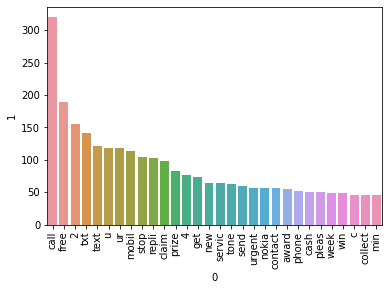

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
ham_words = []
for msg in df[df['target'] == 0]['text_preprocessed'].tolist():
  for word in msg.split():
    ham_words.append(word)

In [ ]:
len(ham_words)

34771

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


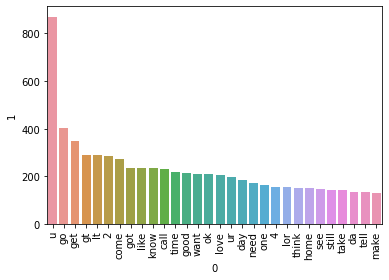

In [ ]:
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0],pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# **4. Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
x = tfidf.fit_transform(df['text_preprocessed']).toarray()
x.shape

(5169, 6629)

In [ ]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import metrics

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)
y_predict1 = gnb.predict(x_test)
print(metrics.accuracy_score(y_test,y_predict1))
print(metrics.confusion_matrix(y_test,y_predict1))
print(metrics.precision_score(y_test,y_predict1))

0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [ ]:
mnb.fit(x_train, y_train)
y_predict2 = mnb.predict(x_test)
print(metrics.accuracy_score(y_test,y_predict2))
print(metrics.confusion_matrix(y_test,y_predict2))
print(metrics.precision_score(y_test,y_predict2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bnb.fit(x_train, y_train)
y_predict3 = bnb.predict(x_test)
print(metrics.accuracy_score(y_test,y_predict3))
print(metrics.confusion_matrix(y_test,y_predict3))
print(metrics.precision_score(y_test,y_predict3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


In [ ]:
# tfidf ---> mnb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'ABC' : abc,
    'BC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb,
}


In [ ]:
def train_classifiers(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = metrics.accuracy_score(y_test,y_pred)
  prediction = metrics.precision_score(y_test,y_pred)
  return accuracy, prediction

In [ ]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
prediction = metrics.precision_score(y_test,y_pred)
print(accuracy)
print(prediction)

0.9729206963249516
0.9661016949152542


In [ ]:
train_classifiers(SVC(kernel = 'sigmoid', gamma = 1.0),x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9661016949152542)

In [ ]:
train_classifiers(lrc,x_train,y_train,x_test,y_test)

(0.9448742746615088, 0.9764705882352941)

In [ ]:
accuracy_score = []
precision_score = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifiers(clf,x_train,y_train,x_test,y_test)

  print('For ',name," Accuracy_score : ",current_accuracy," Precision_score : ",current_precision)

  accuracy_score.append(current_accuracy)
  precision_score.append(current_precision)

For  SVC  Accuracy_score :  0.9729206963249516  Precision_score :  0.9661016949152542
For  KN  Accuracy_score :  0.9003868471953579  Precision_score :  1.0
For  NB  Accuracy_score :  0.9593810444874274  Precision_score :  1.0
For  DT  Accuracy_score :  0.9342359767891683  Precision_score :  0.8301886792452831
For  LR  Accuracy_score :  0.9448742746615088  Precision_score :  0.9764705882352941
For  RF  Accuracy_score :  0.97678916827853  Precision_score :  0.9913793103448276
For  ABC  Accuracy_score :  0.9613152804642167  Precision_score :  0.9298245614035088
For  BC  Accuracy_score :  0.960348162475822  Precision_score :  0.875968992248062
For  ETC  Accuracy_score :  0.9758220502901354  Precision_score :  0.9747899159663865
For  GBDT  Accuracy_score :  0.9516441005802708  Precision_score :  0.8928571428571429
For  XGB  Accuracy_score :  0.9506769825918762  Precision_score :  0.9142857142857143
